# CRICKET PLAYER PERFORMANCE ANALYSIS (VIRAT KOHLI)

### I performed web scraping to collect cricket player data from ESPNcricinfo using the outer HTML method and then pasted the data into an Excel spreadsheet.

### Note: Last updated data on june 2024

## DATA ANALYSIS WITH PANDAS AND VISUALIZATION WITH MATPLOTLIB

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read the data

In [2]:
df= pd.read_excel("virat kohli.xlsx") 

In [3]:
df.head()

,Runs,Time spent,Balls Faced,4s,6s,SR,Pos,Dismissal,Inns,Format,Opposition,Ground,Start Date,Runs_scored
0,12,33.0,22.0,1.0,0.0,54.54,2.0,lbw,1.0,odi,v Sri Lanka,Dambulla,2008-08-18,12.0
1,37,82.0,67.0,6.0,0.0,55.22,2.0,caught,2.0,odi,v Sri Lanka,Dambulla,2008-08-20,37.0
2,25,40.0,38.0,4.0,0.0,65.78,1.0,run out,1.0,odi,v Sri Lanka,Colombo (RPS),2008-08-24,25.0
3,54,87.0,66.0,7.0,0.0,81.81,1.0,bowled,1.0,odi,v Sri Lanka,Colombo (RPS),2008-08-27,54.0
4,31,45.0,46.0,3.0,1.0,67.39,1.0,lbw,2.0,odi,v Sri Lanka,Colombo (RPS),2008-08-29,31.0


## Finding Missing Values

### Info returns the null values in the data column wise as 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Runs         559 non-null    object        
 1   Time spent   493 non-null    float64       
 2   Balls Faced  559 non-null    float64       
 3   4s           559 non-null    float64       
 4   6s           559 non-null    float64       
 5   SR           558 non-null    float64       
 6   Pos          559 non-null    float64       
 7   Dismissal    559 non-null    object        
 8   Inns         576 non-null    float64       
 9   Format       582 non-null    object        
 10  Opposition   582 non-null    object        
 11  Ground       582 non-null    object        
 12  Start Date   582 non-null    datetime64[ns]
 13  Runs_scored  559 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 63.8+ KB


In [5]:
df.isnull

<bound method DataFrame.isnull of     Runs  Time spent  Balls Faced   4s   6s      SR  Pos Dismissal  Inns  \
0     12        33.0         22.0  1.0  0.0   54.54  2.0       lbw   1.0   
1     37        82.0         67.0  6.0  0.0   55.22  2.0    caught   2.0   
2     25        40.0         38.0  4.0  0.0   65.78  1.0   run out   1.0   
3     54        87.0         66.0  7.0  0.0   81.81  1.0    bowled   1.0   
4     31        45.0         46.0  3.0  1.0   67.39  1.0       lbw   2.0   
..   ...         ...          ...  ...  ...     ...  ...       ...   ...   
577   24        41.0         24.0  0.0  1.0  100.00  2.0    caught   1.0   
578   37        34.0         28.0  1.0  3.0  132.14  2.0    bowled   1.0   
579    0         8.0          5.0  0.0  0.0    0.00  2.0    caught   1.0   
580    9        10.0          9.0  0.0  1.0  100.00  2.0    bowled   1.0   
581   76        87.0         59.0  6.0  2.0  128.81  2.0    caught   1.0   

    Format      Opposition         Ground Start Date 

## Handling Missing Values

### Removing the rows where the Time spent and Dismissal type as a empty cell or Null

In [6]:
columns=['Time spent', 'Dismissal']
df.dropna(subset=columns, inplace=True)
df.head()

,Runs,Time spent,Balls Faced,4s,6s,SR,Pos,Dismissal,Inns,Format,Opposition,Ground,Start Date,Runs_scored
0,12,33.0,22.0,1.0,0.0,54.54,2.0,lbw,1.0,odi,v Sri Lanka,Dambulla,2008-08-18,12.0
1,37,82.0,67.0,6.0,0.0,55.22,2.0,caught,2.0,odi,v Sri Lanka,Dambulla,2008-08-20,37.0
2,25,40.0,38.0,4.0,0.0,65.78,1.0,run out,1.0,odi,v Sri Lanka,Colombo (RPS),2008-08-24,25.0
3,54,87.0,66.0,7.0,0.0,81.81,1.0,bowled,1.0,odi,v Sri Lanka,Colombo (RPS),2008-08-27,54.0
4,31,45.0,46.0,3.0,1.0,67.39,1.0,lbw,2.0,odi,v Sri Lanka,Colombo (RPS),2008-08-29,31.0


### Performing mean imputation on numerical data in the selected column 

In [7]:
data=['Runs_Scored', 'Balls_Faced', '4s', '6s', 'Strike_Rate', 'Position']
for column in data:
    if column in df.columns and df[column].dtype in ['float64', 'int64']:
        mean=df[column].mean()
        df[column].fillna(mean, inplace=True)
print(df)

    Runs  Time spent  Balls Faced   4s   6s      SR  Pos Dismissal  Inns  \
0     12        33.0         22.0  1.0  0.0   54.54  2.0       lbw   1.0   
1     37        82.0         67.0  6.0  0.0   55.22  2.0    caught   2.0   
2     25        40.0         38.0  4.0  0.0   65.78  1.0   run out   1.0   
3     54        87.0         66.0  7.0  0.0   81.81  1.0    bowled   1.0   
4     31        45.0         46.0  3.0  1.0   67.39  1.0       lbw   2.0   
..   ...         ...          ...  ...  ...     ...  ...       ...   ...   
577   24        41.0         24.0  0.0  1.0  100.00  2.0    caught   1.0   
578   37        34.0         28.0  1.0  3.0  132.14  2.0    bowled   1.0   
579    0         8.0          5.0  0.0  0.0    0.00  2.0    caught   1.0   
580    9        10.0          9.0  0.0  1.0  100.00  2.0    bowled   1.0   
581   76        87.0         59.0  6.0  2.0  128.81  2.0    caught   1.0   

    Format      Opposition         Ground Start Date  Runs_scored  
0      odi     v Sr

C:\Users\sriga\AppData\Local\Temp\ipykernel_5388\1698160463.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean, inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 581
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Runs         493 non-null    object        
 1   Time spent   493 non-null    float64       
 2   Balls Faced  493 non-null    float64       
 3   4s           493 non-null    float64       
 4   6s           493 non-null    float64       
 5   SR           492 non-null    float64       
 6   Pos          493 non-null    float64       
 7   Dismissal    493 non-null    object        
 8   Inns         493 non-null    float64       
 9   Format       493 non-null    object        
 10  Opposition   493 non-null    object        
 11  Ground       493 non-null    object        
 12  Start Date   493 non-null    datetime64[ns]
 13  Runs_scored  493 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 57.8+ KB


### Printing the cleaned data

In [9]:
print(df.to_string(index=False))

Runs  Time spent  Balls Faced   4s  6s     SR  Pos  Dismissal  Inns Format     Opposition             Ground Start Date  Runs_scored
  12        33.0         22.0  1.0 0.0  54.54  2.0        lbw   1.0    odi    v Sri Lanka           Dambulla 2008-08-18         12.0
  37        82.0         67.0  6.0 0.0  55.22  2.0     caught   2.0    odi    v Sri Lanka           Dambulla 2008-08-20         37.0
  25        40.0         38.0  4.0 0.0  65.78  1.0    run out   1.0    odi    v Sri Lanka      Colombo (RPS) 2008-08-24         25.0
  54        87.0         66.0  7.0 0.0  81.81  1.0     bowled   1.0    odi    v Sri Lanka      Colombo (RPS) 2008-08-27         54.0
  31        45.0         46.0  3.0 1.0  67.39  1.0        lbw   2.0    odi    v Sri Lanka      Colombo (RPS) 2008-08-29         31.0
  2*         6.0          2.0  0.0 0.0 100.00  7.0    not out   1.0    odi    v Sri Lanka      Colombo (RPS) 2009-09-14          2.0
  16        28.0         24.0  1.0 0.0  66.66  4.0     caught   2.0  

In [10]:
df.columns

Index(['Runs', 'Time spent', 'Balls Faced', '4s', '6s', 'SR', 'Pos',
       'Dismissal', 'Inns', 'Format', 'Opposition', 'Ground', 'Start Date',
       'Runs_scored'],
      dtype='object')

# FINDING INSIGHTS

# ODI (One Day International)

## Filtering the Data to ODI Format to find ODI Stats

In [11]:
odi_df = df[df['Format'] == 'odi']

### Average Runs in ODI Format

In [12]:
odi_avg_runs = odi_df['Runs_scored'].mean()
print(odi_avg_runs)

47.97950819672131


### Average Strikerate in ODI Format

In [13]:
odi_avg_strikerate = odi_df['SR'].mean()
print(odi_avg_strikerate)

78.97967078189299


### Number of centuries in ODI Format

In [14]:
No_of_centuries_odi = odi_df[odi_df['Runs_scored'] >= 100].value_counts()
print(No_of_centuries_odi)

Runs  Time spent  Balls Faced  4s    6s   SR      Pos  Dismissal   Inns  Format  Opposition      Ground              Start Date  Runs_scored
102   120.0       83.0         13.0  2.0  122.89  3.0  caught      1.0   odi     v West Indies   Port of Spain       2013-07-05  102.0          1
114*  127.0       99.0         14.0  0.0  115.15  3.0  not out     2.0   odi     v West Indies   Port of Spain       2019-08-14  114.0          1
138   202.0       140.0        6.0   5.0  98.57   3.0  caught      1.0   odi     v South Africa  Chennai             2015-10-22  138.0          1
183   211.0       148.0        22.0  1.0  123.64  3.0  caught      2.0   odi     v Pakistan      Mirpur              2012-03-18  183.0          1
100*  82.0        52.0         8.0   7.0  192.30  3.0  not out     2.0   odi     v Australia     Jaipur              2013-10-16  100.0          1
      113.0       83.0         8.0   2.0  120.48  4.0  not out     1.0   odi     v Bangladesh    Mirpur              2011-02-19  

In [15]:
No_of_centuries_odi.count()

42

### Number of Half Centuries in ODI Format

In [46]:
No_of_half_centuries_odi = odi_df[odi_df['Runs_scored'] >= 50].value_counts()
print(No_of_half_centuries_odi)

Runs  Time spent  Balls Faced  4s    6s   SR      Pos  Dismissal  Inns  Format  Opposition      Ground         Start Date  Runs_scored
51    69.0        56.0         5.0   1.0  91.07   3.0  bowled     1.0   odi     v Netherlands   Bengaluru      2023-11-12  51.0           1
118   193.0       121.0        11.0  1.0  97.52   3.0  caught     2.0   odi     v Australia     Visakhapatnam  2010-10-20  118.0          1
100*  113.0       83.0         8.0   2.0  120.48  4.0  not out    1.0   odi     v Bangladesh    Mirpur         2011-02-19  100.0          1
      82.0        52.0         8.0   7.0  192.30  3.0  not out    2.0   odi     v Australia     Jaipur         2013-10-16  100.0          1
183   211.0       148.0        22.0  1.0  123.64  3.0  caught     2.0   odi     v Pakistan      Mirpur         2012-03-18  183.0          1
                                                                                                                                         ..
77    105.0       65.0   

In [47]:
No_of_half_centuries_odi.count()

103

### Total Runs in ODI Format

In [16]:
odi_Total_runs = odi_df['Runs_scored'].sum()
print(odi_Total_runs)

11707.0


### Runs with boundaries

In [17]:
runs_with_boundaries_odi = ((odi_df['4s'] * 4) + (odi_df['6s'] * 6)).sum()
runs_with_boundaries_odi

5116.0

### Runs with 1's, 2's and 3's

In [18]:
runs_with_singles_odi = odi_Total_runs - runs_with_boundaries_odi
runs_with_singles_odi

6591.0

### Total Runs by Opposition in ODI Format

In [19]:
total_runs_by_opposition_odi = odi_df.groupby('Opposition')['Runs_scored'].sum().reset_index()
total_runs_by_opposition_odi.set_index('Opposition')

,Runs_scored
Opposition,
v Afghanistan,122.0
v Australia,1655.0
v Bangladesh,910.0
v England,1134.0
v Ireland,78.0
v Netherlands,63.0
v New Zealand,1645.0
v Pakistan,678.0
v South Africa,1416.0


### Dismissal Types in ODI Format

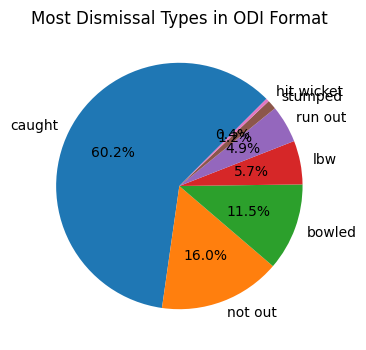

In [20]:
plt.figure(figsize=(8,4))
dismissal_type = odi_df['Dismissal'].value_counts()
plt.pie(dismissal_type, labels=dismissal_type.index, autopct='%1.1f%%', startangle=45)
plt.title('Most Dismissal Types in ODI Format')
plt.show()

# Test Format

## Filtering the data to TEST Format to find Test Stats

In [21]:
test_df = df[df['Format'] == 'test']

### Average Runs in Test Format

In [22]:
test_avg_runs = test_df['Runs_scored'].mean()
print(test_avg_runs)

41.53896103896104


### Average Strikerate in Test Format

In [23]:
test_avg_strikerate = test_df['SR'].mean()
print(test_avg_strikerate)

47.38876623376623


### Number of centuries in Test Format

In [24]:
No_of_centuries_test = test_df[test_df['Runs_scored'] >= 100].value_counts()
print(No_of_centuries_test)

Runs  Time spent  Balls Faced  4s    6s   SR     Pos  Dismissal  Inns  Format  Opposition      Ground         Start Date  Runs_scored
103   266.0       191.0        11.0  0.0  53.92  4.0  lbw        2.0   test    v Sri Lanka     Galle          2015-08-12  103.0          1
      284.0       193.0        14.0  1.0  53.36  5.0  lbw        2.0   test    v New Zealand   Bengaluru      2012-08-31  103.0          1
235   515.0       340.0        25.0  1.0  69.11  4.0  caught     2.0   test    v England       Wankhede       2016-12-08  235.0          1
213   386.0       267.0        17.0  2.0  79.77  4.0  caught     2.0   test    v Sri Lanka     Nagpur         2017-11-24  213.0          1
211   536.0       366.0        20.0  0.0  57.65  4.0  lbw        1.0   test    v New Zealand   Indore         2016-10-08  211.0          1
204   295.0       246.0        24.0  0.0  82.92  4.0  lbw        1.0   test    v Bangladesh    Hyderabad      2017-02-09  204.0          1
200   375.0       283.0        2

In [25]:
No_of_centuries_test.count()

18

### Number of Half Centuries in Test Format

In [55]:
No_of_half_centuries_test = test_df[test_df['Runs_scored'] >= 50].value_counts()
print(No_of_half_centuries_test)

Runs  Time spent  Balls Faced  4s    6s   SR     Pos  Dismissal  Inns  Format  Opposition      Ground         Start Date  Runs_scored
50    133.0       96.0         8.0   0.0  52.08  4.0  caught     1.0   test    v England       The Oval       2021-09-02  50.0           1
149   277.0       225.0        22.0  1.0  66.22  4.0  caught     2.0   test    v England       Birmingham     2018-08-01  149.0          1
103   284.0       193.0        14.0  1.0  53.36  5.0  lbw        2.0   test    v New Zealand   Bengaluru      2012-08-31  103.0          1
      292.0       197.0        10.0  0.0  52.28  4.0  lbw        3.0   test    v England       Nottingham     2018-08-18  103.0          1
107   266.0       206.0        15.0  1.0  51.94  5.0  caught     2.0   test    v Australia     Chennai        2013-02-22  107.0          1
115   267.0       184.0        12.0  0.0  62.50  4.0  caught     2.0   test    v Australia     Adelaide       2014-12-09  115.0          1
116   237.0       213.0        1

In [56]:
No_of_half_centuries_test.count()

42

### Total Runs in Test Format

In [26]:
test_Total_runs = test_df['Runs_scored'].sum()
print(test_Total_runs)

6397.0


### Runs with boundaries

In [27]:
runs_with_boundaries_test = ((test_df['4s'] * 4) + (test_df['6s'] * 6)).sum()
runs_with_boundaries_test

2994.0

### Runs with 1's, 2's and 3's

In [28]:
runs_with_singles_test = test_Total_runs - runs_with_boundaries_test
runs_with_singles_test

3403.0

### Total Runs by Opposition in test Format

In [29]:
total_runs_by_opposition_test = test_df.groupby('Opposition')['Runs_scored'].sum().reset_index()
total_runs_by_opposition_test.set_index('Opposition')

,Runs_scored
Opposition,
v Australia,1411.0
v Bangladesh,287.0
v England,1790.0
v New Zealand,723.0
v South Africa,876.0
v Sri Lanka,688.0
v West Indies,622.0


### Most Dismissal Types in Test Format

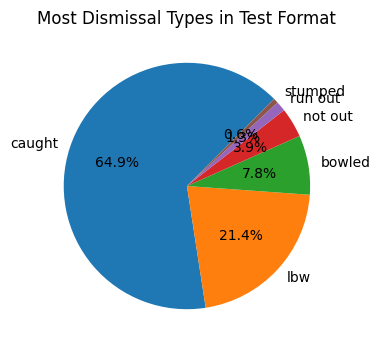

In [30]:
plt.figure(figsize=(8,4))
dismissal_type = test_df['Dismissal'].value_counts()
plt.pie(dismissal_type, labels=dismissal_type.index, autopct='%1.1f%%', startangle=45)
plt.title('Most Dismissal Types in Test Format')
plt.show()

# T20 Format

## Filtering the data to T20 Format to find T20 Stats

In [31]:
t20_df = df[df['Format'] == 't20']

### Average Runs in T20 Format

In [32]:
t20_avg_runs = t20_df['Runs_scored'].mean()
print(t20_avg_runs)

35.0


### Average Strikerate in T20 Format

In [33]:
t20_avg_strikerate = t20_df['SR'].mean()
print(t20_avg_strikerate)

115.73410526315787


### Number of centuries in T20 Format

In [34]:
No_of_centuries_t20 = t20_df[t20_df['Runs_scored'] >= 100].value_counts()
print(No_of_centuries_t20)

Runs  Time spent  Balls Faced  4s    6s   SR     Pos  Dismissal  Inns  Format  Opposition     Ground        Start Date  Runs_scored
122*  90.0        61.0         12.0  6.0  200.0  2.0  not out    1.0   t20     v Afghanistan  Dubai (DICS)  2022-09-08  122.0          1
Name: count, dtype: int64


In [35]:
No_of_centuries_t20.count()

1

### Number of Half Centuries in T20 Format

In [58]:
No_of_half_centuries_t20 = t20_df[t20_df['Runs_scored'] >= 50].value_counts()
print(No_of_half_centuries_t20)

Runs  Time spent  Balls Faced  4s    6s   SR      Pos  Dismissal  Inns  Format  Opposition      Ground         Start Date  Runs_scored
50    49.0        36.0         2.0   1.0  138.88  3.0  bowled     2.0   t20     v Australia     Sydney         2016-01-31  50.0           1
57*   66.0        50.0         3.0   1.0  114.00  3.0  not out    2.0   t20     v Bangladesh    Mirpur         2014-03-28  57.0           1
89*   63.0        47.0         11.0  1.0  189.36  3.0  not out    1.0   t20     v West Indies   Wankhede       2016-03-31  89.0           1
82*   98.0        53.0         6.0   4.0  154.71  3.0  not out    2.0   t20     v Pakistan      Melbourne      2022-10-23  82.0           1
      78.0        51.0         9.0   2.0  160.78  3.0  not out    2.0   t20     v Australia     Mohali         2016-03-27  82.0           1
80*   103.0       52.0         7.0   2.0  153.84  2.0  not out    1.0   t20     v England       Ahmedabad      2021-03-20  80.0           1
78*   61.0        61.0   

In [59]:
No_of_half_centuries_t20.count()

33

### Total Runs in T20 Format

In [60]:
t20_Total_runs = t20_df['Runs_scored'].sum()
print(t20_Total_runs)

3325.0


### Runs with boundaries

In [61]:
runs_with_boundaries_t20 = ((t20_df['4s'] * 4) + (t20_df['6s'] * 6)).sum()
runs_with_boundaries_t20

1792.0

### Runs with 1's, 2's and 3's

In [62]:
runs_with_singles_t20 = t20_Total_runs - runs_with_boundaries_t20
runs_with_singles_t20

1533.0

### Total Runs by Opposition in T20 Format

In [63]:
total_runs_by_opposition_t20 = t20_df.groupby('Opposition')['Runs_scored'].sum().reset_index()
total_runs_by_opposition_t20.set_index('Opposition')

,Runs_scored
Opposition,
v Afghanistan,225.0
v Australia,584.0
v Bangladesh,230.0
v England,538.0
v Hong Kong,59.0
v Ireland,1.0
v Netherlands,62.0
v New Zealand,243.0
v Pakistan,492.0


### Most Dismissal Types in T20 Format

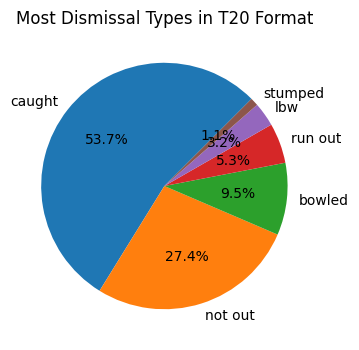

In [64]:
plt.figure(figsize=(8,4))
dismissal_type = t20_df['Dismissal'].value_counts()
plt.pie(dismissal_type, labels=dismissal_type.index, autopct='%1.1f%%', startangle=45)
plt.title('Most Dismissal Types in T20 Format')
plt.show()

## DATA VISUALIZATION 

# Most Dismissal Types in All Formats

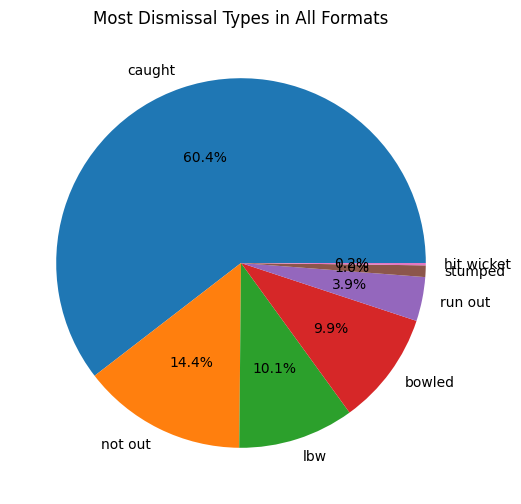

In [65]:
plt.figure(figsize=(8,6))
dismissal_type = df['Dismissal'].value_counts()
plt.pie(dismissal_type, labels=dismissal_type.index, autopct='%1.1f%%')
plt.title('Most Dismissal Types in All Formats')
plt.show()

## Total Runs in Various Formats

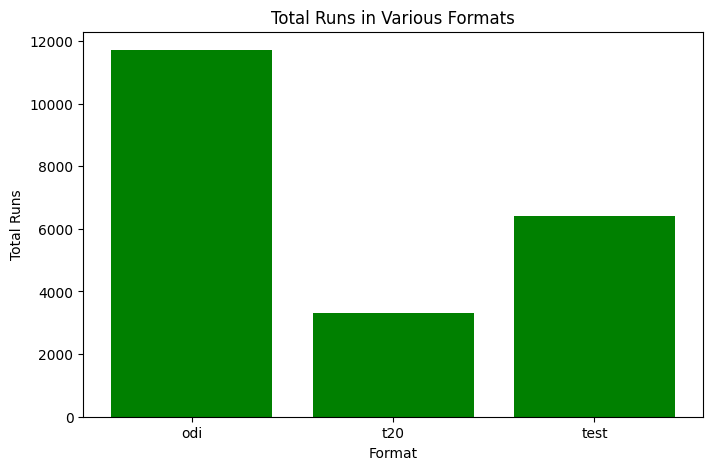

In [66]:
total_runs_by_format = df.groupby('Format')['Runs_scored'].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(total_runs_by_format['Format'], total_runs_by_format['Runs_scored'], color='green')
plt.xlabel('Format')
plt.ylabel('Total Runs')
plt.title('Total Runs in Various Formats') 
plt.show()

## Percentage of Runs Scored Against Each Opposition

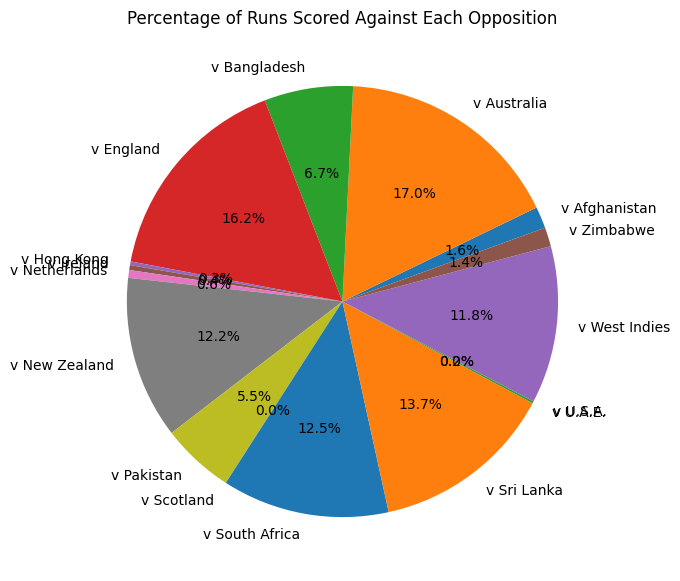

In [67]:
total_runs_by_opposition = df.groupby('Opposition')['Runs_scored'].sum()
plt.figure(figsize=(10, 7))
plt.pie(total_runs_by_opposition, labels=total_runs_by_opposition.index, autopct='%1.1f%%', startangle=20)
plt.title('Percentage of Runs Scored Against Each Opposition')
plt.show()

## Total Runs in Various Grounds

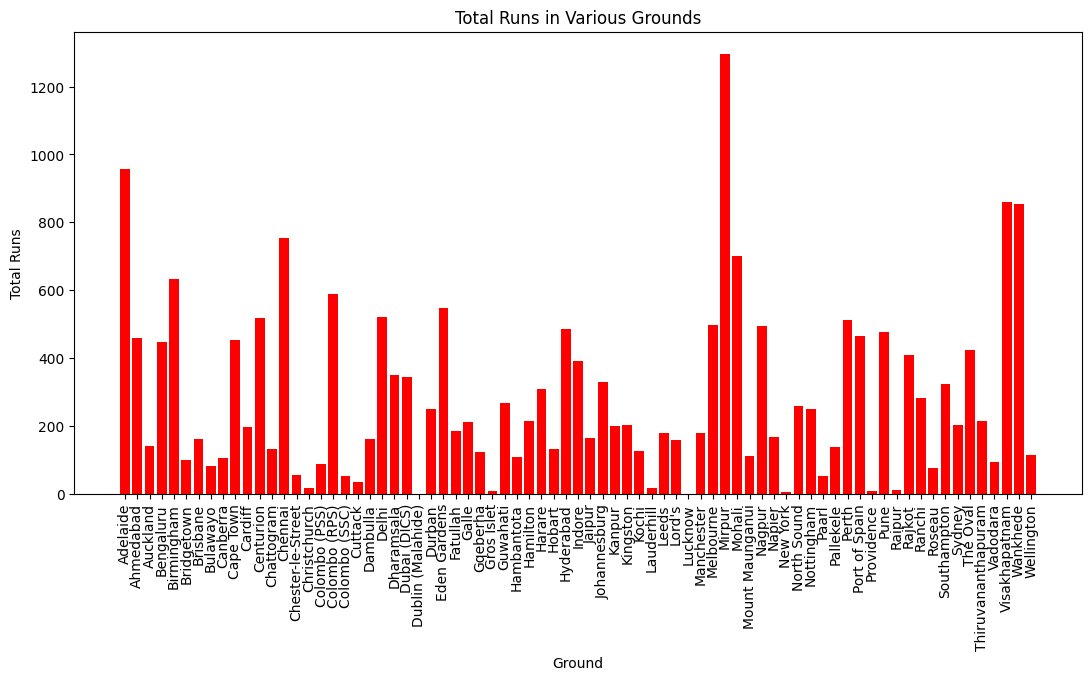

In [68]:
total_runs_by_ground = df.groupby('Ground')['Runs_scored'].sum().reset_index()
plt.figure(figsize=(13, 6))
plt.bar(total_runs_by_ground['Ground'], total_runs_by_ground['Runs_scored'], color='red')
plt.xlabel('Ground')
plt.ylabel('Total Runs')
plt.title('Total Runs in Various Grounds') 
plt.xticks(rotation=90)
plt.show()

## Number of Centuries Against Different Opposition Countries

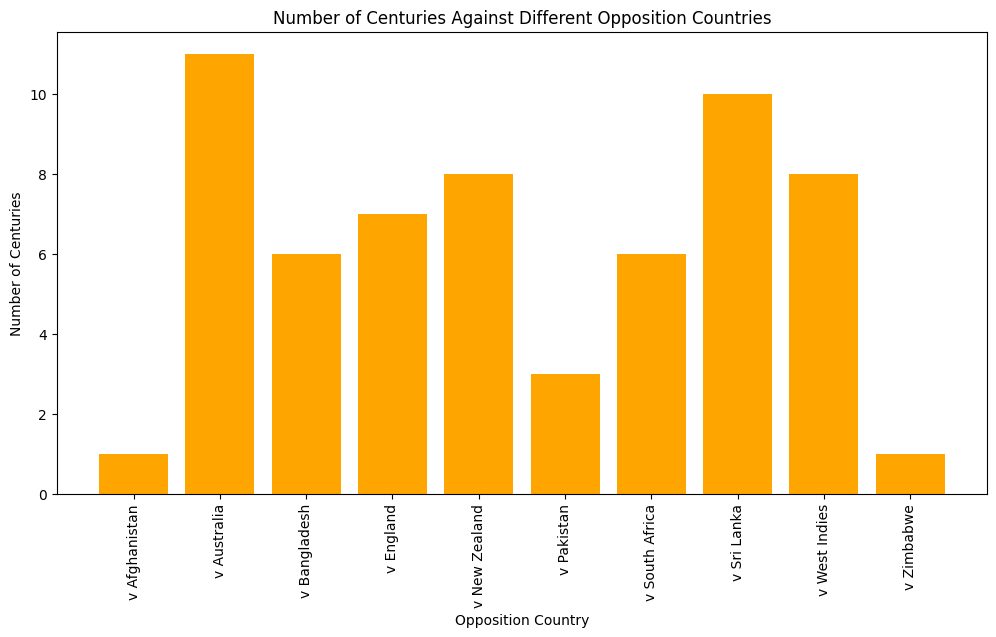

In [80]:
centuries_df = df[df['Runs_scored'] >= 100]
centuries_by_opposition = centuries_df.groupby('Opposition')['Runs_scored'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(centuries_by_opposition['Opposition'], centuries_by_opposition['Runs_scored'], color='orange')
plt.xlabel('Opposition Country')
plt.ylabel('Number of Centuries')
plt.title('Number of Centuries Against Different Opposition Countries')
plt.xticks(rotation=90)  
plt.show()

## Number of Half Centuries Against Different Opposition Countries

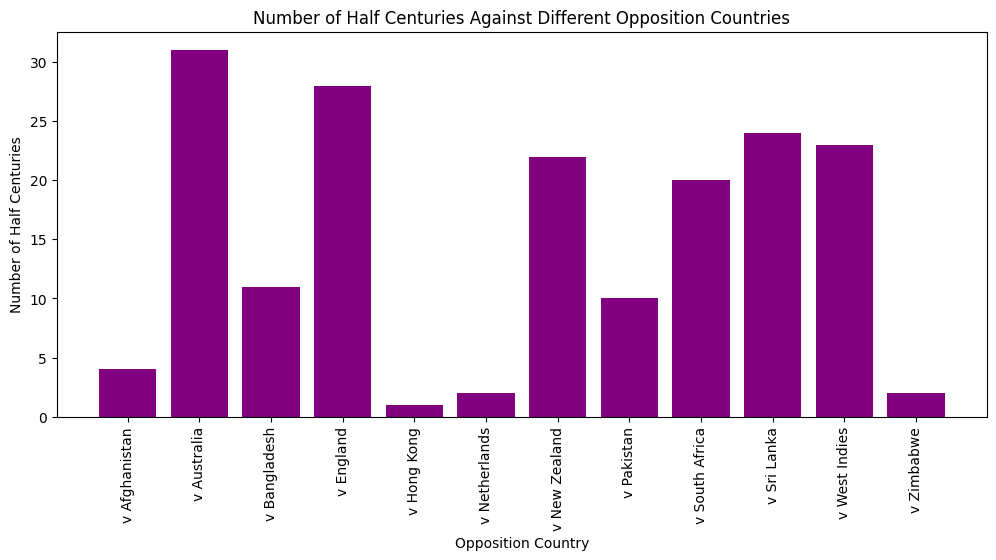

In [82]:
centuries_df = df[df['Runs_scored'] >= 50]
centuries_by_opposition = centuries_df.groupby('Opposition')['Runs_scored'].count().reset_index()
plt.figure(figsize=(12, 5))
plt.bar(centuries_by_opposition['Opposition'], centuries_by_opposition['Runs_scored'], color='purple')
plt.xlabel('Opposition Country')
plt.ylabel('Number of Half Centuries')
plt.title('Number of Half Centuries Against Different Opposition Countries')
plt.xticks(rotation=90)  
plt.show()

## Conclusion: Virat Kohli is the best player in ODI Format